In [1]:
#Deteccion de emociones
#pagina del dataset: https://huggingface.co/datasets/dair-ai/emotion

from datasets import load_dataset
import pandas as pd

dataset = load_dataset("dair-ai/emotion")

c:\Users\matia\Desktop\TwitterAccountAnalyzer\TwitterAccountAnalyzer\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/matia/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 375.98it/s]


In [2]:
train = pd.DataFrame(dataset['train'])

val = pd.DataFrame(dataset['validation'])

test = pd.DataFrame(dataset['test'])

Usando TensorFlow versión 2.12.0


No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/matia/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 375.99it/s]


{0, 1, 2, 3, 4, 5}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [===========

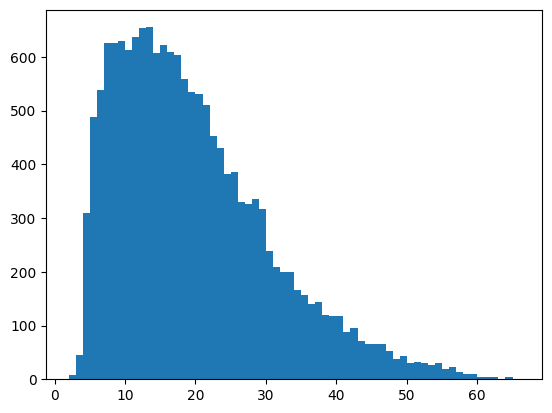

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs_trained), h.history['accuracy'], label='Training')
    plt.plot(range(epochs_trained), h.history['val_accuracy'], label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs_trained), h.history['loss'], label='Training')
    plt.plot(range(epochs_trained), h.history['val_loss'], label='Validation')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    # plt.show()  # Comentado para no mostrar la figura

def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(len(classes))), labels=classes)
    plt.yticks(list(range(len(classes))), labels=classes)
    plt.colorbar(ctx)
    # plt.show()  # Comentado para no mostrar la figura

print('Usando TensorFlow versión', tf.__version__)

from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

train = dataset['train']
val = dataset['validation']
test = dataset['test']

def get_tweet(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

tweets, labels = get_tweet(train)

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
    return padded

padded_train_seq = get_sequences(tokenizer, tweets)

classes = set(labels)
print(classes)

class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

train_labels = names_to_ids(labels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

h = model.fit(
    padded_train_seq,
    train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

# show_history(h)  # Comentado para no mostrar la figura

test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

_ = model.evaluate(test_seq, test_labels)

i = random.randint(0, len(test_labels) - 1)
print('Frase:', test_tweets[i])
print('Emoción:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('Emoción Predicha:', pred_class)

preds = model.predict(test_seq)
classes_x = np.argmax(preds, axis=1)

# show_confusion_matrix(test_labels, classes_x, list(classes))  # Comentado para no mostrar la figura



In [ ]:
#cargar el dataset a utilizar

df = pd.read_csv('..\csv\Mati_tweets.csv') #cambiar por el dataset que se quiera utilizar

In [ ]:
#Crear el traductor..





In [ ]:
# Supongamos que tienes un DataFrame llamado df con una columna llamada "tweet"
tweets = df['tweet'].tolist()

# Obtén las secuencias de los tweets utilizando el tokenizer
tweet_sequences = get_sequences(tokenizer, tweets)

# Realiza las predicciones de las emociones
predictions = model.predict(tweet_sequences)
predicted_labels = np.argmax(predictions, axis=1)

# Mapea los índices de las emociones predichas a las etiquetas correspondientes
predicted_emotions = [index_to_class[label] for label in predicted_labels]

# Agrega una nueva columna "emotion" al DataFrame con las emociones predichas
df['emotion'] = predicted_emotions

# Muestra el DataFrame con las emociones predichas
print(df[['tweet', 'emotion']])
  